# Exercise 14
## Step excitation of a RC-filter using Python (rather than SIMULINK)

![Exercise 14](ex14.png)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy.signal import *
from scipy.integrate import odeint

<IPython.core.display.Javascript object>


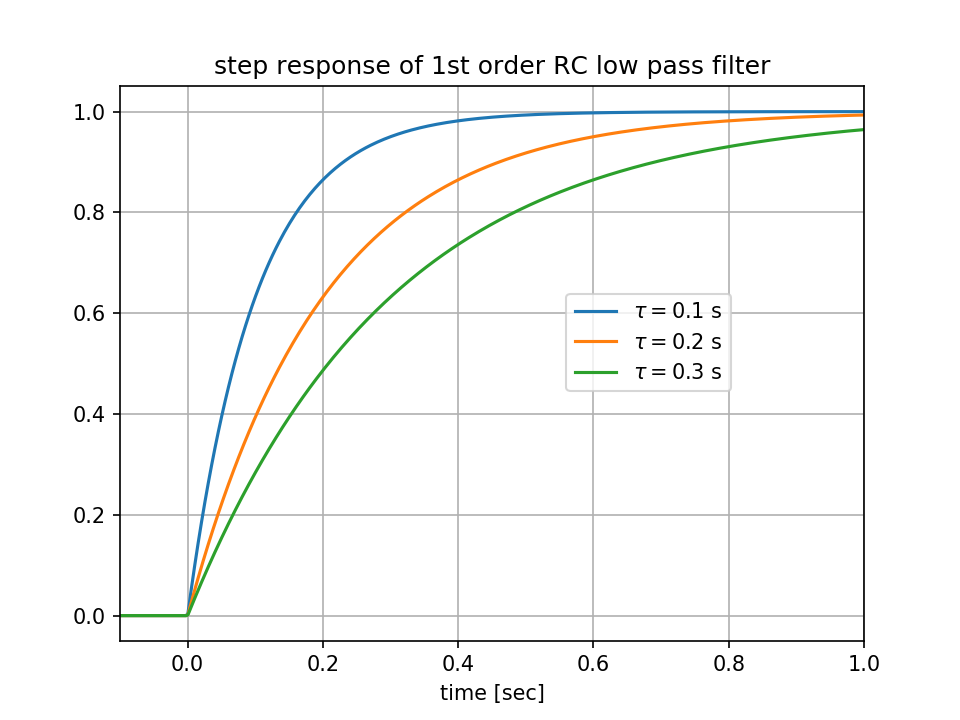

In [2]:
T = np.linspace(-0.5, 2, 1000)  # time values in seconds

fig, ax = plt.subplots(1,1)

for tau in 0.1, 0.2, 0.3:  # time constants in seconds
    def diffeq(y, t):
        "rhs of differential equation, calculate dy/dt"
        return -y/tau + (1/tau if t>=0 else 0)
    
    Y = odeint(diffeq, y0=0., t=T)  # solve diffeq
    ax.plot(T, Y, label=rf"$\tau={tau}$ s")

ax.set_title('step response of 1st order RC low pass filter')
ax.set_xlabel('time [sec]')
ax.legend(loc=[0.6, 0.45])
ax.set_xlim(-0.1,1)
ax.grid()

---
# Exercise 15
## Unit step excitation of a LC-filter using Python (rather than SIMULINK)

![Exercise 15](ex15.png)

------------------------

The second order ODE $ y(t) = u(t) - R C \dot y(t) - L C \ddot y(t) $ can be written
as a system of two first order ODEs:

$$ \begin{aligned}
  \frac d{dt} y_0 &= y_1 \\
  \frac d{dt} y_1 &= \frac{u - y_0 - R C y_1}{L C}
\end{aligned} $$

where $y_0\equiv y(t)$ and $y_1\equiv \dot y(t)$.

<IPython.core.display.Javascript object>


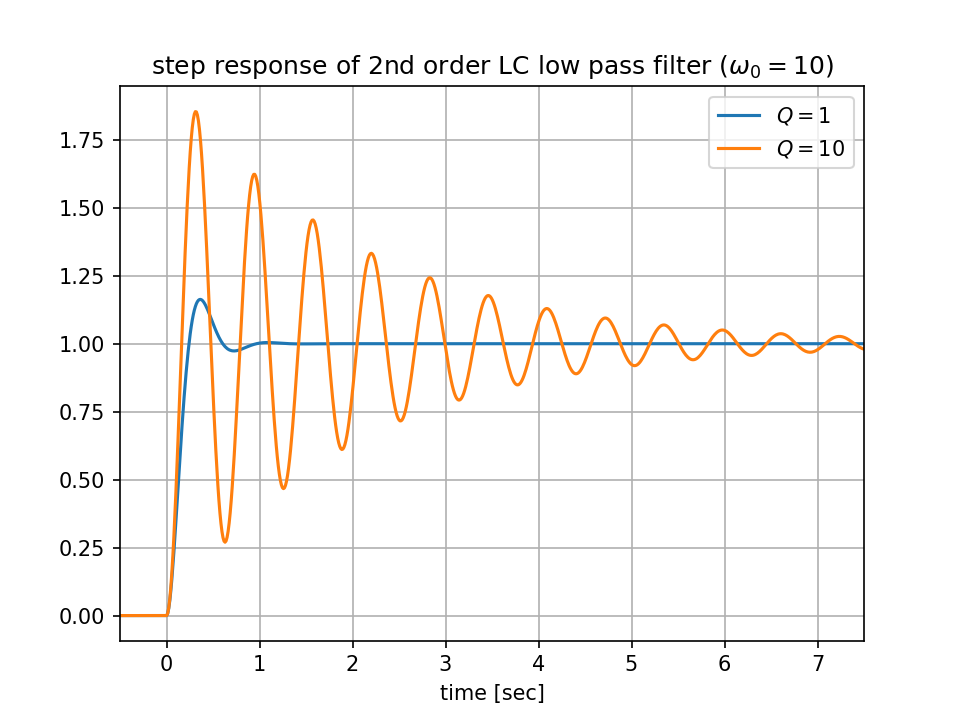

In [3]:
omega0 = 10  # rad/sec
LC = 1 / omega0**2

T = np.linspace(-1, 10, 1000)  # time values in seconds

fig, ax = plt.subplots(1,1)


for Q in 1, 10:  # quality factors
    RC = 1 / (Q * omega0)
    def diffeq2(y, t):
        "rhs of differential equations, calculate dy/dt"
        u = 1. if t >= 0 else 0.  # unit step input
        return y[1], (u - y[0] - RC*y[1]) / LC
    
    Y = odeint(diffeq2, y0=[0., 0.], t=T)  # solve diffeq
    ax.plot(T, Y[::,0], label=rf"$Q={Q}$")

ax.set_title(f'step response of 2nd order LC low pass filter $(\\omega_0={omega0})$')
ax.set_xlabel('time [sec]')
ax.legend()
ax.set_xlim(-0.5, 7.5)
ax.grid()

---
# Exercise 16 (Achtung unvollständig!)
## Various formulations of the transfer-function H(s) of a serial LC-circuit

![Exercise 16](ex16.png)

------------------------



1. Laplace transformation of (2) assuming initial values are zero

$$ Y(s) = U(s) - \frac{s Y(s)}{\omega_0 Q} - \frac{s^2 Y(s)}{\omega_0^2} $$

2. Transfer function
$$ Y(s) \left( 1 + \frac{s}{\omega_0 Q} + \frac{s^2}{\omega_0^2} \right) = U(s) $$

$$ H(s) = \frac{Y(s)}{U(s)} = \left( 1 + \frac{s}{\omega_0 Q} + \frac{s^2}{\omega_0^2} \right)^{-1}
        = \frac{\omega_0^2 Q}{Q s^2 + \omega_0 s + \omega_0^2 Q}
        = \frac{\omega_0^2}{s^2 + \frac{\omega_0}Q s + \omega_0^2}
$$

3A. General transfer function

$$ H(s) = \frac{b_0}{s^2 + a_1 s + a_0},
          \qquad a_0 = b_0 = \omega_0^2, \quad a_1 = \frac{\omega_0}Q $$

3B. Poles

$$ s^2 + \frac{\omega_0}Q s + \omega_0^2 == 0 $$

$$       z = -\frac{\omega_0}{2 Q} \pm \sqrt{\left(\frac{\omega_0}{2 Q}\right)^2 - \omega_0^2}
           = -\frac{\omega_0}{2 Q} \pm \frac{\omega_0}{2} \sqrt{1 - 4Q^2} $$

3C. Factorization

$$ H(s) = \frac{\omega_0}{s - z} \; \frac{\omega_0}{s - z^*} $$

---